In [20]:
#%pip install random-survival-forest
#%pip install scikit-survival

In [21]:
import pandas as pd
data = pd.read_csv('encoded_values_2.csv')
import seaborn as sns
sns.set(style="whitegrid")

In [22]:
# Check for missing values
missing_values = data.isnull().sum()
data = data.drop(columns=['Education_Level'])

# Check data types
data_types = data.dtypes

missing_values, data_types


(Gender                             0
 College                            0
 Churn                              0
 Level                              0
 Education_Level                    0
 Residence                          0
 Usage_Freq                         0
 Network_Strength                   0
 Voice_Calls                        0
 Mobile_Data_Internet               0
 SMS_Text_Messaging                 0
 Data_Exhaustion                    0
 Multiple_Networks                  0
 Other_Networks_Better_Services     0
 Poor_Network_Quality_Coverage      0
 Insufficient_Data_Allowance        0
 Unsatisfactory_Customer_Service    0
 High_Costs_Pricing                 0
 Monthly_Data_Usage                 0
 dtype: int64,
 Gender                             int64
 College                            int64
 Churn                              int64
 Level                              int64
 Residence                          int64
 Usage_Freq                         int64
 Network_St

<lifelines.CoxPHFitter: fitted with 768 total observations, 644 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 768
number of events observed = 124
   partial log-likelihood = -723.74
         time fit was run = 2024-07-18 15:13:13 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.56      0.57      0.19           -0.94           -0.18                0.39                0.83
College                         -0.03      0.97      0.05           -0.14            0.07                0.87                1.07
Residence                       -0.09      0.91      0.20           -0.48            0.30                0.62                1.35
Usage_Freq                      -0.00      1.00      0.06           -0.12            0.12                0.88                1.12
Network_Strength                 0.23      1.26      0.09            0.06            0.40                1.07                1.49
Voice_Calls                      0.16      1.18      0.25           -0.32            0.65                0.73                1.91
Mobile_Data_Internet             0.32      1.37      0.30           -0.27            0.90                0.76                2.46
SMS_Text_Messaging              -0.10      0.90      0.18           -0.46            0.26                0.63                1.30
Data_Exhaustion                  0.41      1.51      0.27           -0.11            0.93                0.90                2.54
Multiple_Networks                0.21      1.23      0.43           -0.63            1.05                0.53                2.85
Other_Networks_Better_Services   0.13      1.14      0.27           -0.39            0.66                0.68                1.93
Poor_Network_Quality_Coverage   -0.17      0.85      0.20           -0.56            0.22                0.57                1.25
Insufficient_Data_Allowance      0.12      1.12      0.19           -0.26            0.49                0.77                1.64
Unsatisfactory_Customer_Service -0.15      0.86      0.19           -0.52            0.21                0.59                1.23
High_Costs_Pricing               0.16      1.18      0.19           -0.20            0.53                0.82                1.70
Monthly_Data_Usage              -0.06      0.94      0.07           -0.20            0.08                0.82                1.08

                                 cmp to     z      p  -log2(p)
covariate                                                     
Gender                             0.00 -2.90 <0.005      8.05
College                            0.00 -0.62   0.53      0.90
Residence                          0.00 -0.45   0.65      0.62
Usage_Freq                         0.00 -0.05   0.96      0.06
Network_Strength                   0.00  2.71   0.01      7.24
Voice_Calls                        0.00  0.67   0.50      0.99
Mobile_Data_Internet               0.00  1.06   0.29      1.78
SMS_Text_Messaging                 0.00 -0.55   0.58      0.79
Data_Exhaustion                    0.00  1.54   0.12      3.03
Multiple_Networks                  0.00  0.49   0.62      0.68
Other_Networks_Better_Services     0.00  0.50   0.61      0.70
Poor_Network_Quality_Coverage      0.00 -0.85   0.40      1.33
Insufficient_Data_Allowance        0.00  0.61   0.54      0.88
Unsatisfactory_Customer_Service    0.00 -0.83   0.41      1.30
High_Costs_Pricing                 0.00  0.89   0.38      1.41
Monthly_Data_Usage                 0.00 -0.85   0.39      1.34
---
Concordance = 0.62
Partial AIC = 1479.47
log-likelihood ratio test = 23.34 on 16 df
-log2(p) of ll-ratio test = 3.25

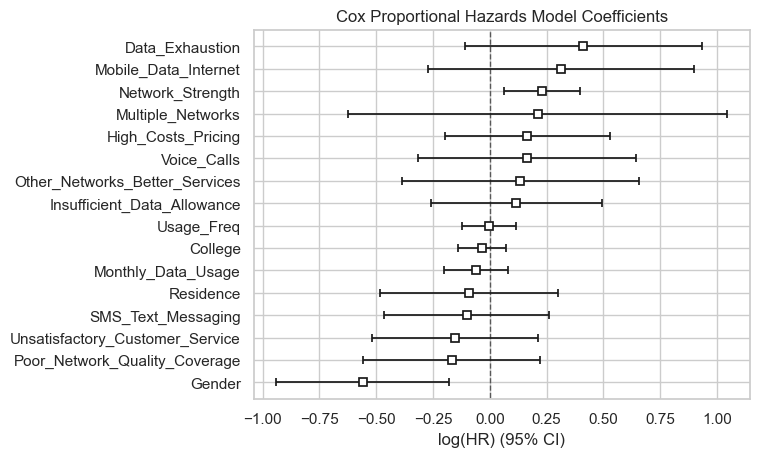

In [24]:
from lifelines import CoxPHFitter
# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model
cph.fit(data, duration_col='Level', event_col='Churn')

# Display the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()


In [25]:
data['Level'] = data['Level']/100

data

,Gender,College,Churn,Level,Residence,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,1,2,0,1.0,1,2,1,1,1,1,1,1,1,1,0,0,1,3
1,0,2,0,1.0,0,0,3,0,1,1,1,1,1,1,1,0,0,4
2,1,2,0,3.0,0,0,3,0,1,1,1,1,0,1,1,0,1,2
3,1,2,0,1.0,0,0,3,1,1,0,1,1,1,1,0,0,1,4
4,1,2,0,1.0,0,0,1,1,1,1,1,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,3,1,3.0,1,2,1,0,1,1,0,1,1,0,1,0,1,3
764,1,3,0,2.0,1,4,2,1,1,0,1,1,0,1,0,1,0,4
765,0,3,0,3.0,0,0,3,1,1,1,1,1,1,1,0,0,0,4
766,0,3,0,3.0,0,0,5,1,0,0,0,1,1,1,0,0,0,0


In [26]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

# Instantiate each AFT fitter
weibull_aft = WeibullAFTFitter()
lognormal_aft = LogNormalAFTFitter()
loglogistic_aft = LogLogisticAFTFitter()

# Fit to data and collect AIC values
aft_aic_values = {}
for model in [weibull_aft, lognormal_aft, loglogistic_aft]:
    model.fit(data, duration_col='Level', event_col='Churn')
    aft_aic_values[model.__class__.__name__] = model.AIC_
    print("The AIC value for", model.__class__.__name__, "is", model.AIC_)

# Find the model with the lowest AIC
best_aft_model = min(aft_aic_values, key=aft_aic_values.get)
print("The AFT model with the lowest AIC is:", best_aft_model)


The AIC value for WeibullAFTFitter is 815.5162664173345
The AIC value for LogNormalAFTFitter is 822.647123647952
The AIC value for LogLogisticAFTFitter is 820.2500662532609
The AFT model with the lowest AIC is: WeibullAFTFitter


In [27]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data, duration_col='Level', event_col='Churn')
weibull_aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 768 total observations, 644 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
   number of observations = 768
number of events observed = 124
           log-likelihood = -389.758
         time fit was run = 2024-07-18 15:13:14 UTC

---
                                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                         
lambda_ College                          0.017     1.017     0.021          -0.025           0.059               0.975               1.060
        Data_Exhaustion                 -0.176     0.839     0.108          -0.386           0.035               0.680               1.036
        Gender                           0.218     1.244     0.080           0.062           0.374               1.064               1.454
        High_Costs_Pricing              -0.060     0.941     0.076          -0.209           0.088               0.812               1.091
        Insufficient_Data_Allowance     -0.050     0.951     0.078          -0.203           0.103               0.816               1.108
        Mobile_Data_Internet            -0.118     0.889     0.122          -0.357           0.122               0.700               1.129
        Monthly_Data_Usage               0.026     1.026     0.029          -0.031           0.082               0.970               1.086
        Multiple_Networks               -0.104     0.901     0.173          -0.444           0.235               0.642               1.264
        Network_Strength                -0.093     0.911     0.035          -0.162          -0.025               0.850               0.976
        Other_Networks_Better_Services  -0.052     0.950     0.108          -0.263           0.160               0.769               1.174
        Poor_Network_Quality_Coverage    0.071     1.073     0.080          -0.086           0.228               0.917               1.256
        Residence                        0.032     1.032     0.082          -0.128           0.191               0.880               1.211
        SMS_Text_Messaging               0.039     1.040     0.075          -0.107           0.186               0.898               1.204
        Unsatisfactory_Customer_Service  0.063     1.065     0.076          -0.085           0.211               0.918               1.235
        Usage_Freq                       0.002     1.002     0.025          -0.047           0.051               0.954               1.052
        Voice_Calls                     -0.080     0.923     0.099          -0.274           0.115               0.760               1.122
        Intercept                        2.112     8.266     0.307           1.510           2.714               4.528              15.090
rho_    Intercept                        0.905     2.471     0.072           0.764           1.045               2.147               2.844

                                         cmp to      z       p  -log2(p)
param   covariate                                                       
lambda_ College                           0.000  0.773   0.440     1.186
        Data_Exhaustion                   0.000 -1.633   0.102     3.287
        Gender                            0.000  2.736   0.006     7.329
        High_Costs_Pricing                0.000 -0.801   0.423     1.240
        Insufficient_Data_Allowance       0.000 -0.642   0.521     0.941
        Mobile_Data_Internet              0.000 -0.963   0.335     1.576
        Monthly_Data_Usage                0.000  0.889   0.374     1.420
        Multiple_Networks                 0.000 -0.604   0.546     0.873
        Network_Strength                  0.000 -2.666   0.008     7.025
        Other_Networks_Better_Services    0.000 -0.477   0.633     0.660
        Poor_Ne

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

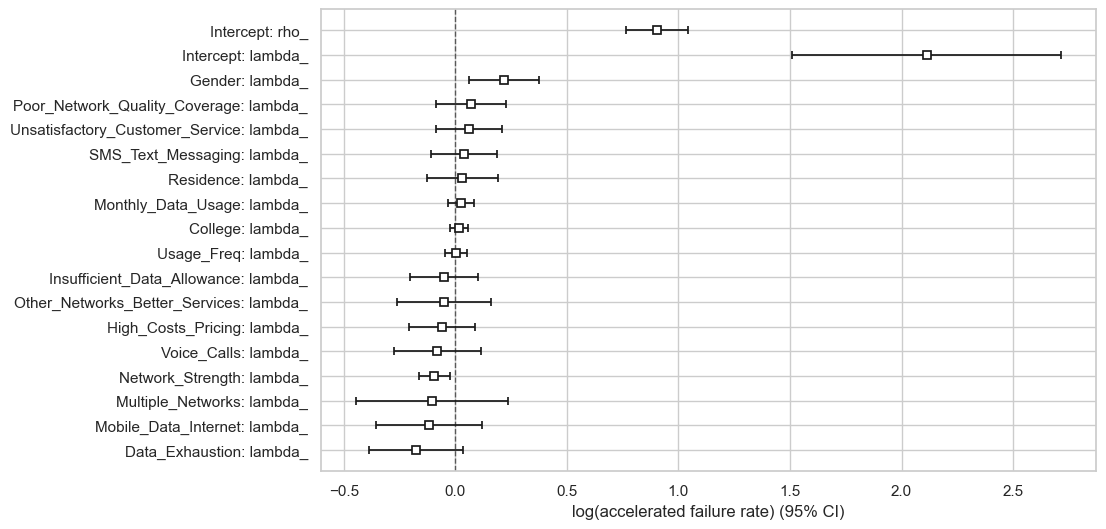

In [28]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()


In [29]:
# from lifelines import CoxPHFitter

# # Initialize the Cox Proportional Hazards model
# cph = CoxPHFitter()

# # Fit the model
# cph.fit(data, duration_col='Level', event_col='Churn')

# # Display the summary
# cph.print_summary()

# # Plot the coefficients
# cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
# plt.show()


In [30]:
# Check proportional hazards assumption
cph.check_assumptions(data, p_value_threshold=0.05)

# Interpretation and validation
# (This will involve checking the summary output, coefficients, and assumption checks)


Proportional hazard assumption looks okay.


[]

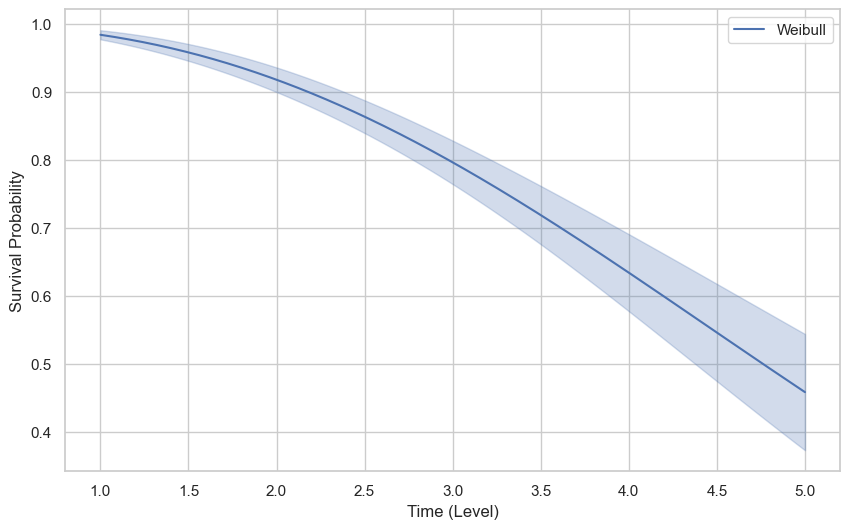

In [31]:
from lifelines import  WeibullFitter


# Fit the Weibull model
wf = WeibullFitter()
wf.fit(durations=data['Level'], event_observed=data['Churn'])

# Plot the survival functions of both models
plt.figure(figsize=(10, 6))
wf.plot_survival_function(label='Weibull')
plt.xlabel('Time (Level)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [32]:
# # Lognormal model summary
# lnf.print_summary()

# # Weibull model summary
# wf.print_summary()

# # Goodness-of-fit metrics
# lnf_aic = lnf.AIC_
# wf_aic = wf.AIC_

# lnf_aic, wf_aic


In [33]:
# # Get the AIC value of the Cox PH model
# cox_aic = cph.AIC_partial_

# # AIC values of all models
# aic_values = {
#     'Cox PH': cox_aic,
#     'Lognormal': lnf.AIC_,
#     'Weibull': wf.AIC_
# }

# aic_values


In [34]:
# cox_cindex

In [35]:
# from lifelines.utils import concordance_index

# # Ensure 'Level' and 'Churn' columns are 1-dimensional
# level = data['Level'].values.flatten()
# churn = data['Churn'].values.flatten()

# # Calculate the C-index for Cox PH model
# cox_predictions = -cph.predict_partial_hazard(data).values.flatten()
# cox_cindex = concordance_index(level, cox_predictions, churn)

# # Calculate the C-index for Lognormal model
# lognormal_predictions = -lnf.predict(data[['Level']]).values.flatten()
# lognormal_cindex = concordance_index(level, lognormal_predictions, churn)

# # Calculate the C-index for Weibull model
# weibull_predictions = -wf.predict(data[['Level']]).values.flatten()
# weibull_cindex = concordance_index(level, weibull_predictions, churn)

# cox_cindex, lognormal_cindex, weibull_cindex


In [36]:
# print(f"Level shape: {level.shape}")
# print(f"Churn shape: {churn.shape}")
# print(f"Cox Predictions shape: {cox_predictions.shape}")
# print(f"Lognormal Predictions shape: {lognormal_predictions.shape}")
# print(f"Weibull Predictions shape: {weibull_predictions.shape}")
